In [34]:
import numpy as np
import csv
from simulated_annealing import SAnnealing as RecocidoSimulado
import random
import matplotlib.pyplot as plt
import time


In [35]:
def readFile(size, name):
    m = np.zeros((0), dtype=int)
    m_prec = np.zeros((0), dtype=int)
    
    with open(name, newline='') as File:  
        reader = csv.reader(File, delimiter=',', quotechar=',',quoting=csv.QUOTE_MINIMAL)
        i=0
        for row in File:
            
            row = row.rstrip()
            separador = ","
            row = row.split(",")
            row = list(map(int, row))
            m_np = np.array(row)
            
            if i < size :
                m = np.append(m, m_np, axis=0)
                #print(m_np)
            else:
                m_prec = np.append(m_prec, m_np, axis=0)
            i+=1
    
    m = np.array(m).reshape(size,size)
    m_prec = np.array(m_prec).reshape(int((len(m_prec)/2)),2)
    return m, m_prec    

In [36]:
def _sol_inicial(numero_nodos) -> []:
    rango_numeros = range(1, numero_nodos ) 
    cantidad_elementos = numero_nodos - 2

    sol_inicial = random.sample(rango_numeros, cantidad_elementos) 
    return sol_inicial 
 

In [37]:
def verificacion_reglas(REGLAS_PRESEDENCIA:[],SOLUCION:[])->bool:

    for NODO in REGLAS_PRESEDENCIA:
    # Recorrido de solucion

        for indice_estado_siguiente in range(len(SOLUCION)):
                        
            if indice_estado_siguiente > 0 :
                        
                indice_estado_anterios = indice_estado_siguiente -1
                nodo_dependencias = ([SOLUCION[indice_estado_anterios],SOLUCION[indice_estado_siguiente] ] ) 
                        
                if (np.array(nodo_dependencias) == np.array(NODO)).all() :
                    return True
                    
    return False

In [38]:
 
def _sol_vecina(SOLUCION: []) -> []: 
                     
    rango_numeros = range(1, 100 - 2)  
     
    SOLUCION_AUX = SOLUCION[:]    
    indx1 = random.choice(rango_numeros)  
    indx2 = random.choice(rango_numeros)  
    SOLUCION_AUX[indx1], SOLUCION_AUX[indx2] = SOLUCION[indx2], SOLUCION[indx1]  
  

    return SOLUCION_AUX

    
        


In [39]:
def _inicializacion(tamanio:int)->[]:
     
    solucion_inicial = random.sample(range(1, tamanio-1), tamanio-2)
    solucion_inicial.insert(0,0)
    solucion_inicial.insert(tamanio,tamanio-1)

    return solucion_inicial

In [40]:
def forzar_cumprimiento_reglas(REGLAS_PRESEDENCIA:[], SOLUCION:[], COSTOS:[])->[]:

    solucion_inicial  = verificacion_reglas(REGLAS_PRESEDENCIA , SOLUCION)

    while(solucion_inicial):
    
        SOLUCION = _inicializacion(len(SOLUCION))
        solucion_inicial = verificacion_reglas(REGLAS_PRESEDENCIA , SOLUCION)
    
    return SOLUCION

In [41]:
def _cost(SOLUCION:[], COSTOS:[], REGLAS_PRESEDENCIA)->float:

        costo_solucion = 0 
        
        indice_estado_anterior = 0
        for indice_estado_siguiente in SOLUCION: 
                 
            if indice_estado_siguiente > 0: 
                peso = COSTOS[indice_estado_anterior][indice_estado_siguiente] 
                costo_solucion += peso if peso != 0  else 100 

                for tupla_reglas in REGLAS_PRESEDENCIA:
                     
                     ARREGLO_REGLAS = list(tupla_reglas) 

                     if [indice_estado_anterior,indice_estado_siguiente] ==  ARREGLO_REGLAS : 
                         
                        costo_solucion += 100 

                indice_estado_anterior = indice_estado_siguiente 

        return costo_solucion

In [42]:
def SOP(COSTOS, REGLAS_PRESEDENCIA) -> []:  
    SOLUCION = _inicializacion(100)
    SOLUCION = forzar_cumprimiento_reglas(REGLAS_PRESEDENCIA, SOLUCION, COSTOS)  
    SAnnealing = RecocidoSimulado(step=0.01,final_temperature=0.1, temperature= 5000,alpha=0.95,equilibrium=10,domain=COSTOS)
    resultado = SAnnealing.fit(objetive=_cost,first=_inicializacion,neighbor=_sol_vecina,COSTOS=COSTOS, REGLAS_PRESEDENCIA=REGLAS_PRESEDENCIA, SOLUCION=SOLUCION) 

    plt.plot(range(len(SAnnealing.cost_)), [x[1] for x in SAnnealing.cost_ ])
    plt.show()

    

SOP()

In [43]:
nombre = './Instancias/txt/100.txt'
numero_nodos = 100
COSTOS, REGLAS_PRESEDENCIA = readFile(numero_nodos, nombre) 

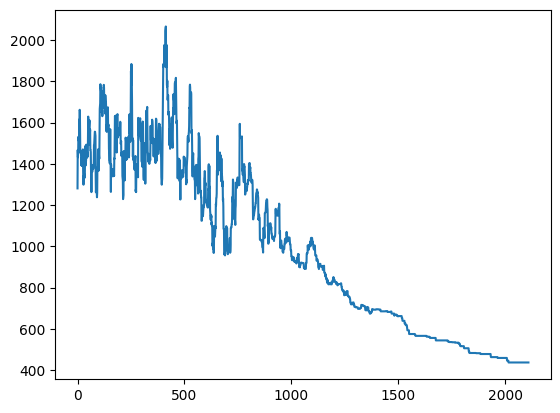

Tiempo de ejecución: 2.09474778175354


In [44]:
inicio = time.time()

SOP(COSTOS, REGLAS_PRESEDENCIA)

fin = time.time()
tiempo_ejecucion = fin - inicio
print("Tiempo de ejecución:", tiempo_ejecucion)